In [33]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools.dsp.preprocessing import preprocess
import tools.viz.rasters as rt
from tools.dataTools import plot_VAF


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# TODO: add example data to the repo and run on that
data_dir = "/data/bnd-data/raw/M046/M046_2024_12_18_16_00"
fname0 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_1.mat")

In [28]:
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.


In [29]:
df['MOp_spikes'][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [31]:
for region in ["MOp", "SSp_ll", "CP", "Thal"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 319
Neurons in SSp_ll: 167
Neurons in CP: 509
Neurons in Thal: 232


In [34]:
df_ = preprocess(df)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.10/lib/python3.10/site-packages/pyaldata/utils.py:155: UserWarning: motion_sensor_xy might be a time-varying field. It matches the length of Thal_spikes on 99.87562189054727% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.10/lib/python3.10/site-packages/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.10/lib/python3.10/site-packages/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.10/lib/python3.10/site-packages/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/vir

Combined every 3 bins
Resulting Thal_spikes ephys data shape is (NxT): (204, 200)
Resulting all_spikes ephys data shape is (NxT): (12, 200)
Resulting SSp_ll_spikes ephys data shape is (NxT): (99, 200)
Resulting MOp_spikes ephys data shape is (NxT): (185, 200)
Resulting CP_spikes ephys data shape is (NxT): (252, 200)


In [46]:
data_list = [df_]
areas = ["MOp", "SSp_ll", "CP", "Thal"]
n_components = 99
epoch = None
model = "pca"

(0.0, 300.0)

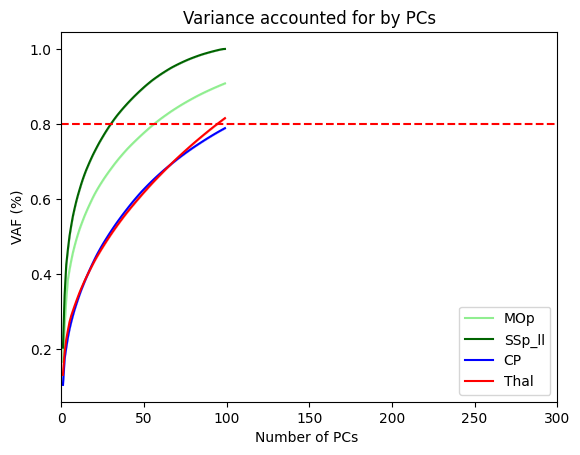

In [48]:
fig, ax = plt.subplots()
ax = plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model, show=False)
ax.set_xlim([0, 300])

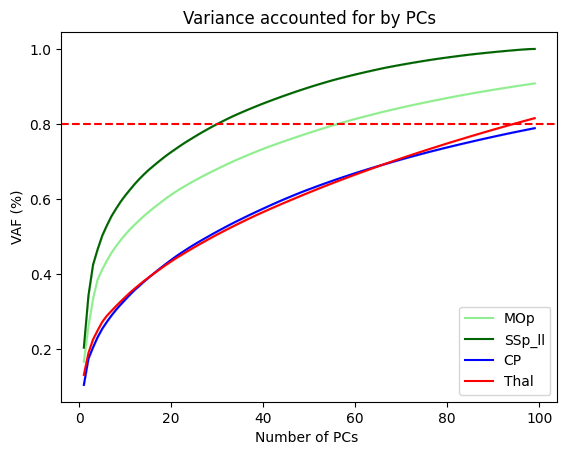

In [49]:
fig, ax = plt.subplots()
plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model, show=True)
